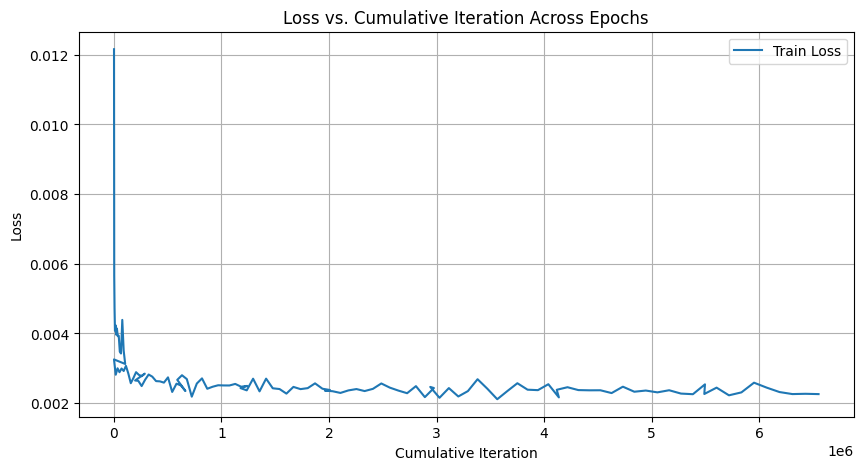

In [10]:
import pandas as pd
import re
import matplotlib.pyplot as plt

def load_log_to_dataframe(file_path):
    pattern = re.compile(r"Epoch (\d+), Iteration (\d+): Train Loss: ([\d\.]+), Train_val Loss: ([\d\.]+), Validation Loss: ([\d\.]+), (\d{2}:\d{2}:\d{2})")
    data = []

    with open(file_path, 'r') as file:
        for line in file:
            match = pattern.search(line)
            if match:
                epoch, iteration, train_loss, train_val_loss, val_loss, time = match.groups()
                data.append({
                    "Epoch": int(epoch),
                    "Iteration": int(iteration),
                    "Train Loss": float(train_loss),
                    "Train Validation Loss": float(train_val_loss),
                    "Validation Loss": float(val_loss),
                    "Time": time
                })

    df = pd.DataFrame(data)
    # Convert columns to appropriate data types
    df['Epoch'] = df['Epoch'].astype(int)
    df['Iteration'] = df['Iteration'].astype(int)
    return df

def plot_data(df):
    if 'Iteration' in df.columns and 'Epoch' in df.columns:
        # Calculate cumulative iteration count properly
        df.sort_values(by=['Epoch', 'Iteration'], inplace=True)
        df['Cumulative Iteration'] = df.groupby('Epoch')['Iteration'].cumsum()
        df['Cumulative Iteration'] = df['Cumulative Iteration'] + df['Epoch'].shift(1, fill_value=0).cumsum() * df['Iteration'].max()

        # Plotting
        plt.figure(figsize=(10, 5))
        plt.plot(df['Cumulative Iteration'], df['Train Loss'], label='Train Loss')
        # plt.plot(df['Cumulative Iteration'], df['Train Validation Loss'], label='Train Validation Loss')
        # plt.plot(df['Cumulative Iteration'], df['Validation Loss'], label='Validation Loss')
        plt.xlabel('Cumulative Iteration')
        plt.ylabel('Loss')
        plt.title('Loss vs. Cumulative Iteration Across Epochs')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print("Error: Required columns not found in DataFrame.")

# Example usage
file_path = r"C:\Users\Dennis\Desktop\columnModelBig_2.1.8.1_512\modelLog2.1.8.1_newData_511-20240423_202926.log"
df = load_log_to_dataframe(file_path)
plot_data(df)


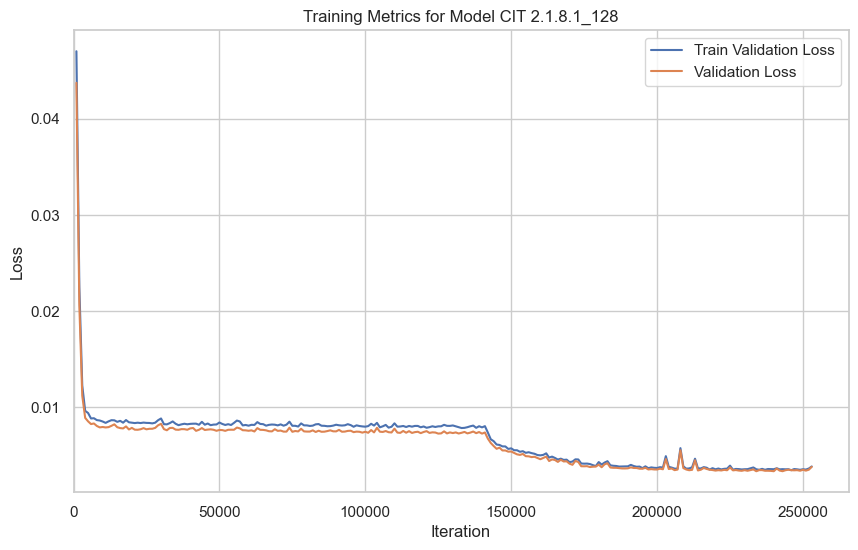

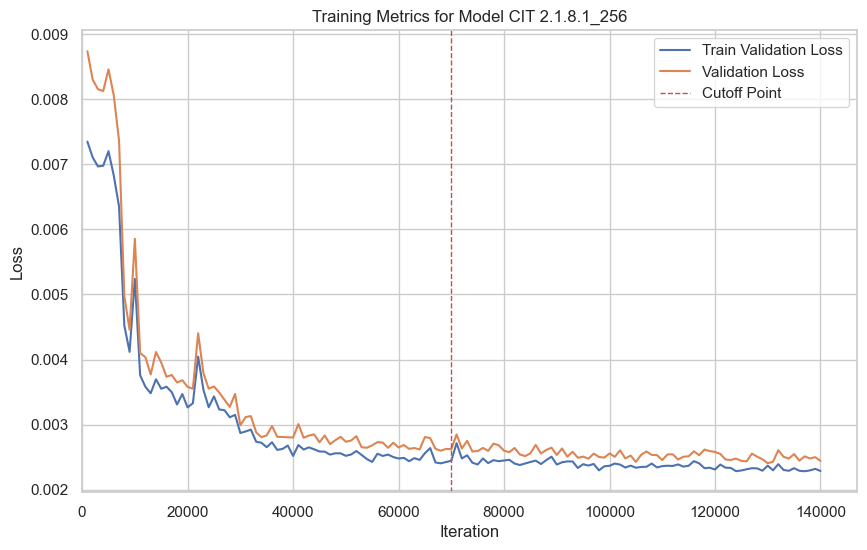

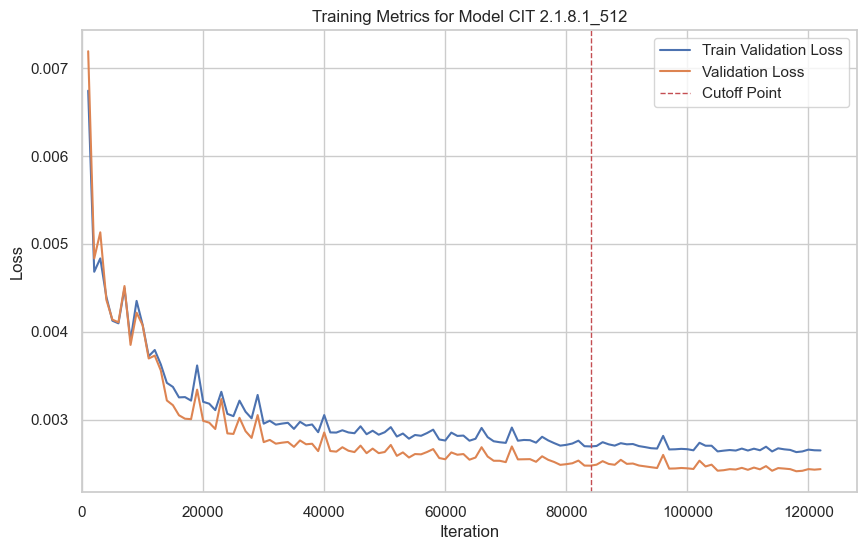

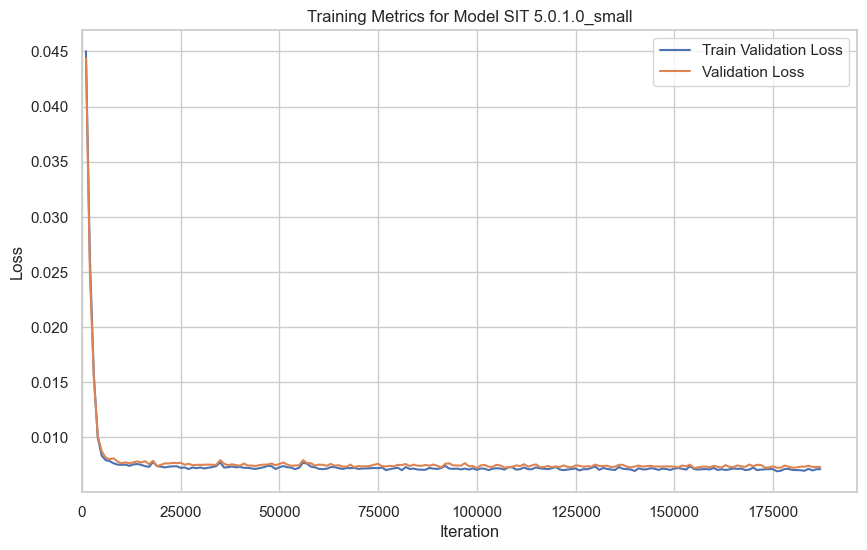

In [49]:
import pandas as pd
import re
import matplotlib.pyplot as plt

def load_log_to_dataframe(file_path):
    pattern = re.compile(r"Epoch (\d+), Iteration (\d+): Train Loss: ([\d\.]+), Train_val Loss: ([\d\.]+), Validation Loss: ([\d\.]+), (\d{2}:\d{2}:\d{2})")
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            match = pattern.search(line)
            if match:
                epoch, iteration, train_loss, train_val_loss, val_loss, time = match.groups()
                data.append({
                    "Epoch": int(epoch),
                    "Iteration": int(iteration),
                    "Train Loss": float(train_loss),
                    "Train Validation Loss": float(train_val_loss),
                    "Validation Loss": float(val_loss),
                    "Time": time
                })
    return pd.DataFrame(data)

def plot_data(df, modelname = '', cutoff_index = None):
    # Plotting
    plt.figure(figsize=(10, 6))


    # plt.plot(df.index, df['Train Loss'], label='Train Loss')
    plt.plot(df.index * 1000 + 1000, df['Train Validation Loss'], label='Train Validation Loss')
    plt.plot(df.index * 1000 + 1000, df['Validation Loss'], label='Validation Loss')

    if cutoff_index is not None:
        plt.axvline(x=cutoff_index, color='r', linestyle='--', linewidth=1, label='Cutoff Point')

    plt.title('Training Metrics for Model ' + modelname)
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.xlim(left=0)
    plt.legend()
    plt.grid(True)
    plt.savefig(f'../../latex/imgs/Training_Metrics_{modelname}.png')
    plt.show()
    


# Model 2.1.8.1_128
file_path = r"C:\Users\Dennis\Desktop\columnModel_2.1.8.0_128\modelLog2.1.8.0_newData_128-20240324_095619.log"
df = load_log_to_dataframe(file_path)
plot_data(df,  modelname='CIT 2.1.8.1_128')

# Model 2.1.8.1_256
file_path = r"C:\Users\Dennis\Desktop\columnModelBig_2.1.8.1_256\modelLog2.1.8.1_newData_256-20240416_174128.log"
df = load_log_to_dataframe(file_path)
plot_data(df, cutoff_index=70000 , modelname='CIT 2.1.8.1_256')

# Model 2.1.8.1_512
file_path = r"C:\Users\Dennis\Desktop\columnModelBig_2.1.8.1_512\modelLog2.1.8.1_newData_511-20240423_202926.log"
df = load_log_to_dataframe(file_path)
plot_data(df, cutoff_index=84000 , modelname='CIT 2.1.8.1_512')

# Model 5.0.1.0_small
file_path = r"C:\Users\Dennis\Desktop\spiralModel_5.0.1.0_small\modelLog5.0.1.0_newData_128-20240407_152741.log"
df = load_log_to_dataframe(file_path)
plot_data(df, modelname='SIT 5.0.1.0_small')

# # Model 5.0.1.0_big
# file_path = r"C:\Users\Dennis\Desktop\spiralModel_5.0.1.0_big\modelLog5.0.1.1_newData_BIG-20240426_024429.log"
# df = load_log_to_dataframe(file_path)
# plot_data(df, modelname='SIT 5.0.1.0_big')

